In [4]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import numpy as np
import pandas as pd
import scipy.linalg as la
import sympy as sy

%matplotlib inline
%precision 4
plt.style.use('ggplot')
from scipy import linalg
np.set_printoptions(suppress=True)



In [5]:

plt.style.use('ggplot')

nner products are closely related to norms and distance. The (standard) inner product (or dot product) of two n dimensional vectors v and w is given by:

<v,w>=v1w1+...+vnwn
I.e. the inner product is just the sum of the product of the components. Certain ‘special’ matrices also define inner products, and we will see some of those later.

<function matplotlib.patches.Patch.draw(self, renderer)>

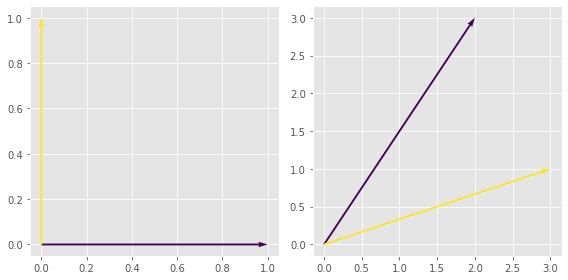

In [6]:
e1 = np.array([1,0])
e2 = np.array([0,1])
A = np.array([[2,3],[3,1]])
v1=A.dot(e1)
v2=A.dot(e2)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_vectors([e1, e2])
plt.subplot(1,2,2)
plot_vectors([v1,v2])
plt.tight_layout()
#help(plt.Circle)
plt.Circle(np.array([0,0]),radius=1)
plt.Circle.draw

In [7]:


def plot_vectors(vs):
    """Plot vectors in vs assuming origin at (0,0)."""
    n = len(vs)
    X, Y = np.zeros((n, 2))
    U, V = np.vstack(vs).T
    plt.quiver(X, Y, U, V, range(n), angles='xy', scale_units='xy', scale=1)
    xmin, xmax = np.min([U, X]), np.max([U, X])
    ymin, ymax = np.min([V, Y]), np.max([V, Y])
    xrng = xmax - xmin
    yrng = ymax - ymin
    xmin -= 0.05*xrng
    xmax += 0.05*xrng
    ymin -= 0.05*yrng
    ymax += 0.05*yrng
    plt.axis([xmin, xmax, ymin, ymax])

Example - Change to a Different Basis
Now, consider a second pair of (linearly independent) vectors in $R^2$, say $v1$ and $v2$, and suppose that the coordinates of $v1$ in the basis $e1$,$e2$ are $(1,3)$ and that the coordinates of v2 in the basis e1,e2 are (4,1). We first find the transformation that takes e1 to v1 and e2 to v2. A matrix representation for this (in the e1,e2 basis) is:

$$
A = 
\left[\begin{matrix}
1 & 4\\
3 & 1
\end{matrix}\right]
$$
Our original transformation $f$ can be expressed with respect to the basis $v1$,$v2$ via

$
BAB^−1
$

In [8]:
A = np.array([[2,1],[3,1]])  # transformation f in standard basis
e1 = np.array([1,0])         # standard basis vectors e1,e2
e2 = np.array([0,1])

print(A.dot(e1))             # demonstrate that Ae1 is (2,3)
print(A.dot(e2))             # demonstrate that Ae2 is (1,1)

# new basis vectors
v1 = np.array([1,3])
v2 = np.array([4,1])

# How v1 and v2 are transformed by A
print("Av1: ")
print(A.dot(v1))
print("Av2: ")
print(A.dot(v2))

# Change of basis from standard to v1,v2
B = np.array([[1,4],[3,1]])
print(B)
B_inv = linalg.inv(B)

print("B B_inv ")
print(B.dot(B_inv))   # check inverse

# Matrix of the transformation with respect to the new basis
T = B.dot(A.dot(B_inv))        # B A B^{-1}

print(T)

print(B_inv)
np.dot(B_inv,(T.dot(e1)))

[2 3]
[1 1]
Av1: 
[5 6]
Av2: 
[ 9 13]
[[1 4]
 [3 1]]
B B_inv 
[[1. 0.]
 [0. 1.]]
[[0.0909 4.6364]
 [0.2727 2.9091]]
[[-0.0909  0.3636]
 [ 0.2727 -0.0909]]


array([0.0909, 0.    ])

You probably learned that the ‘norm’ of a vector v∈Rn, denoted ||v|| is simply its length. For a vector with components

$v=(v1,...,vn)$
   $thenormof:math:‘v‘isgivenby:$
$
||v||=
\sqrt( v1^2+...+v2^n)$
This natural definition of a norm comes from the distance formula. Recall that for two points (x1,y1),(x0,y0) in the plane, the distance between them is given by:

$D=
\sqrt(x1−x0)^2+(y1−y0)^2
 $
The length of a vector in Rn is the distance from the origin, so

$||v||=
\sqrt ((v1−0)^2+...+(vn−0)^2)  = \sqrt (v1^2+...+v2^n )$
The distance between two vectors is the length of their difference:

$d(v,w)=||v−w||$

In [9]:
# norm of a vector
# Note: The numpy linalg package is imported at the top of this notebook


v = np.array([1,2])
linalg.norm(v)

2.23606797749979

In [10]:
# distance between two vectors

w = np.array([1,1])
linalg.norm(v-w)

1.0

In [11]:

A = np.array([[1,0.6],[0.6,4]])
A

array([[1. , 0.6],
       [0.6, 4. ]])

$QR$
This method is very similar to the LU decomposition. The equation to be solved is of the form $Ax = B$. In this particular case, the matrix $A = QR$, where $Q$ is an orthogonal matrix and R is an upper triangular matrix.

  $
  [Ax=B]
  $

  $
  [A=QR]
  $

What are the properties of an orthogonal matrix?

It is a square matrix; \n
Multiplying Q for its transpose, we obtain the identity matrix;
$
QQ^{T}=Q^{T}Q=I
$
The inverse of an orthogonal matrix is equal to its transpose;
$
Q^{T}=Q^{-1}
$

[  6.  15. -23.]


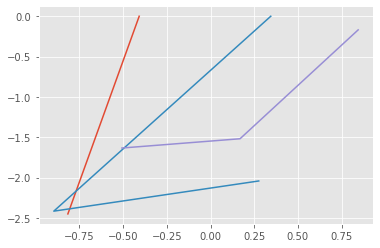

In [12]:
A = np.array([
[2., 1., 1.],
[1., 3., 2.],
[1., 0., 0]])
B = np.array([4., 5., 6.])
Q, R = linalg.qr(A) # QR decomposition with qr function
y = np.dot(Q.T, B) # Let y=Q'.B using matrix multiplication
x = linalg.solve(R, y) # Solve Rx=y
print (x)
plt.plot(Q, R)

In [13]:
np.allclose((la.norm(Q[:,0]), la.norm(Q[:,1])), (1,1))

True

In [14]:
np.allclose(Q@R, A)

True

$Spectral$

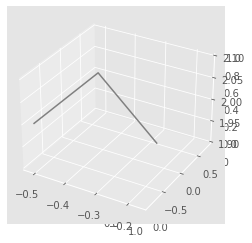

In [15]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
u, v = la.eig(A)
# fig = plt.figure(figsize = (10, 5))
X=v[0]
Y=v[1]
Z=[2]
# plt.plot(u, v)
ax = plt.axes(projection='3d')
ax.plot3D(X, Y, Z, 'gray')

# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [16]:
np.allclose((la.norm(v[:,0]), la.norm(v[:,1])), (1,1))

True

In [17]:
np.allclose(v @ np.diag(u) @ v.T, A)

False

In [18]:
from sympy import Matrix
# List A 
A = [[1, 2, 0], [2, 4, 0], [3, 6, 1]]
  
# Matrix A
A = Matrix(A)
  
# Null Space of A
NullSpace = A.nullspace()   # Here NullSpace is a list
  
NullSpace = Matrix(NullSpace)   # Here NullSpace is a Matrix
print("Null Space : ", NullSpace)
  
# checking whether NullSpace satisfies the
# given condition or not as A * NullSpace = 0
# if NullSpace is null space of A
print(A * NullSpace)

Null Space :  Matrix([[-2], [1], [0]])
Matrix([[0], [0], [0]])


In [19]:
from sympy import Matrix
  
A = [[1, 2, 0], [2, 4, 0], [3, 6, 1]]
   
A = Matrix(A)
  
# Number of Columns
NoC = A.shape[1]
  
# Rank of A
rank = A.rank()
  
# Nullity of the Matrix
nullity = NoC - rank
  
print("Nullity : ", nullity)

Nullity :  1
